# DUOMENŲ NUSKAITYMAS/PASIRUOŠIMAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from matplotlib.ticker import StrMethodFormatter
from pathlib import Path
%matplotlib inline
from itertools import combinations
from collections import Counter

In [4]:
data_dir = Path().resolve().parents[3] / 'data'
klas = pd.read_csv(data_dir / "datasets/gov/bpc/pagalbos_skambuciai/IvykiuKlasifikatorius.csv")
laik = pd.read_csv(data_dir / "datasets/gov/bpc/pagalbos_skambuciai/IvykiuLaikas.csv")

# ĮVYKIŲ KLASIFIKATORIUS. Keli pastebėjimai

In [5]:
klas.head()

,_type,_id,_revision,ivykio_tipo_kodas,aukstesnis_ivykio_tipas,zemesnis_ivykio_tipas
0,datasets/gov/bpc/pagalbos_skambuciai/IvykiuKla...,e01d8ee9-3fc6-40d3-bcfc-fd97ce96bf0b,080fe4e2-843a-4f86-90d0-6eab89caabc6,1.1,Aplinkosauga,Įvykiai dėl kurių gali kilti ar kilo pavojus g...
1,datasets/gov/bpc/pagalbos_skambuciai/IvykiuKla...,0f54c3fe-154c-4e2e-b0ee-5ba58b5e101b,44d33c33-e63d-4e6b-85a5-9fb82647341a,1.2,Aplinkosauga,Įvykiai su laukiniais gyvūnais
2,datasets/gov/bpc/pagalbos_skambuciai/IvykiuKla...,a5297115-60fa-4f39-bf2c-4ef7237e5859,67de496f-71c9-4960-9247-1113cc66ffed,1.3,Aplinkosauga,Teisės pažeidimai aplinkosaugos srityje
3,datasets/gov/bpc/pagalbos_skambuciai/IvykiuKla...,bbce1603-0fc2-4354-93ce-93acb479c0f7,a1d5c98d-c701-4ad9-b0ea-af1f38d43692,10,SPEC tarnybos,SPEC tarnybos
4,datasets/gov/bpc/pagalbos_skambuciai/IvykiuKla...,5c36b7ab-4ce7-4ea8-9e71-a6896c9bb69d,cb31703f-6c38-4893-935a-4ce154b1711c,11,Testavimo pratybos,Testavimo pratybos


In [3]:
klas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _type                    146 non-null    object
 1   _id                      146 non-null    object
 2   _revision                146 non-null    object
 3   ivykio_tipo_kodas        146 non-null    object
 4   aukstesnis_ivykio_tipas  146 non-null    object
 5   zemesnis_ivykio_tipas    146 non-null    object
dtypes: object(6)
memory usage: 7.0+ KB


In [4]:
klas.nunique() # matome, kad vienas ivykio_tipo_kodas pasikartoja 2 kartus

_type                        1
_id                        146
_revision                  146
ivykio_tipo_kodas          145
aukstesnis_ivykio_tipas     15
zemesnis_ivykio_tipas      146
dtype: int64

In [79]:
klas.value_counts('ivykio_tipo_kodas').sort_values(ascending = False).head(5) 

ivykio_tipo_kodas
4.4.4    2
1.2      1
15       1
1.3      1
10       1
dtype: int64

In [78]:
klas[klas['ivykio_tipo_kodas'] == '4.4.4'] # Su tuo pačiu 4.4.4 kodu yra du GMP įvykiai (Prasidėjęs gimdymas ir Gaisras pastate, nežinoma situacija)

,_type,_id,_revision,ivykio_tipo_kodas,aukstesnis_ivykio_tipas,zemesnis_ivykio_tipas
84,datasets/gov/bpc/pagalbos_skambuciai/IvykiuKla...,a117060e-3ddb-4dff-ac2e-bf7989fac9f7,b32d7352-576f-4ef0-890f-6b7d1beb49d4,4.4.4,GMP įvykiai,Prasidėjęs gimdymas
85,datasets/gov/bpc/pagalbos_skambuciai/IvykiuKla...,b5def24e-804a-449b-8392-6b4ae548d51d,3c1c9ad5-a099-4319-953b-4e92292b2255,4.4.4,GMP įvykiai,"Gaisras pastate, nežinoma situacija"


<AxesSubplot:xlabel='aukstesnis_ivykio_tipas'>

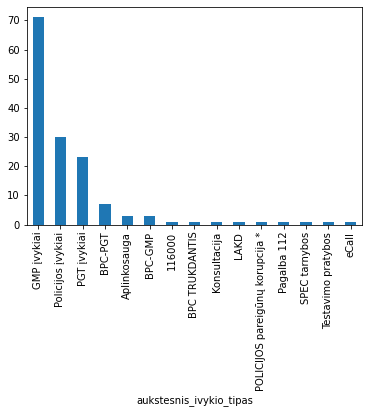

In [6]:
# Dėl kurių įvykių tipų sulaukiama daugiausiai įvykių?
klas.value_counts('aukstesnis_ivykio_tipas').plot.bar()

# ĮVYKIŲ LAIKAS. Duomenų analizė

In [15]:
laik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76307 entries, 0 to 76306
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   _type                  76307 non-null  object
 1   _id                    76307 non-null  object
 2   _revision              76307 non-null  object
 3   ivykio_tipo_kodas._id  76307 non-null  object
 4   menuo                  76307 non-null  int64 
 5   savaites_diena         76307 non-null  int64 
 6   valanda                76307 non-null  int64 
 7   minute                 76307 non-null  object
 8   ivykiu_skaicius        76307 non-null  int64 
 9   dienu_grupeje          76307 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 5.8+ MB


In [16]:
laik.nunique()

_type                        1
_id                      76307
_revision                76307
ivykio_tipo_kodas._id      146
menuo                        3
savaites_diena               7
valanda                     24
minute                       6
ivykiu_skaicius             79
dienu_grupeje                2
dtype: int64

In [17]:
laik.head()

,_type,_id,_revision,ivykio_tipo_kodas._id,menuo,savaites_diena,valanda,minute,ivykiu_skaicius,dienu_grupeje
0,datasets/gov/bpc/pagalbos_skambuciai/IvykiuLaikas,80e2b4ef-e313-4811-b6e2-5b6f5cbc288c,f4191a25-7ddb-4563-aa54-68748835870d,505a4081-64ab-4a13-9fad-ec1ed336e57d,8,1,14,00-09,55,4
1,datasets/gov/bpc/pagalbos_skambuciai/IvykiuLaikas,76ad05e6-b6ca-4977-9f6e-5a04f16041cc,aaf66f2f-877c-40d9-9d93-d5a0420bb208,4158fd9e-cbe9-40ce-9d1a-87aa896f4dab,8,1,14,00-09,3,4
2,datasets/gov/bpc/pagalbos_skambuciai/IvykiuLaikas,009b81c8-0bf5-4542-b87d-4fb2746aff26,c73d64ab-276f-434d-a019-28ff168757a7,0213b529-d9d0-462a-8233-a4e8812d455f,8,1,14,10-19,3,4
3,datasets/gov/bpc/pagalbos_skambuciai/IvykiuLaikas,2e1489e4-924c-492b-bad4-bdd4a992f791,175188b5-d81c-4d44-8417-728c04cb1422,1d3b2c08-46d7-447d-b7dc-e11935ca262e,8,1,14,10-19,1,4
4,datasets/gov/bpc/pagalbos_skambuciai/IvykiuLaikas,492620fc-d3e3-4b8e-80cd-dc48844a280f,fd62ccf4-8ed0-4c5a-b70e-444990c1b6b5,4b327b2f-1740-4e0e-b8c8-06299aeec6d9,8,1,14,10-19,11,4


In [5]:
# Sukuriami nauji stulpeliai 'savaite_valanda_minute', 'paros_metas' ir savaites_metas'
laik['savaite_valanda_minute'] = laik['savaites_diena'].astype(str) + '_' + laik['valanda'].astype(str) +'_'+ laik['minute']

def new_col(laik):
    if (laik['valanda'] == 22) | (laik['valanda'] == 23) | (laik['valanda'] == 0) | (laik['valanda'] == 1) | (laik['valanda'] == 2) | (laik['valanda'] == 3) | (laik['valanda'] == 4) | (laik['valanda'] == 5):
        return 'nakties metu'
    else:
        return 'dienos metu'
laik['paros_metas'] = laik.apply(new_col, axis=1)

def new_col2(laik):
    if (laik['savaites_diena'] == 6) | (laik['savaites_diena'] == 7):
        return 'savaitgalis'
    else:
        return 'darbo diena'
laik['savaites_metas'] = laik.apply(new_col2, axis = 1)

In [176]:
# Kurį 2022 m. vasaros mėnesį fiksuotą daugiausiai įvykių?
laik.groupby('menuo')['ivykiu_skaicius'].sum().to_frame()

,ivykiu_skaicius
menuo,
6,99527
7,102405
8,104541


<AxesSubplot:xlabel='paros_metas'>

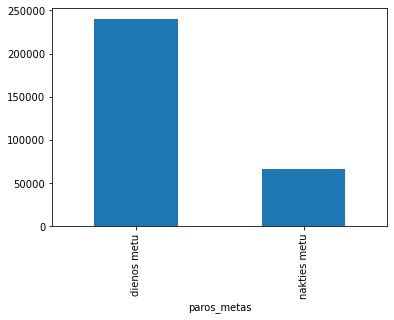

In [28]:
# Kuriuo paros metu nutinka daugiausiai įvykių?
laik.groupby('paros_metas')['ivykiu_skaicius'].sum().plot.bar()

<AxesSubplot:xlabel='savaites_metas'>

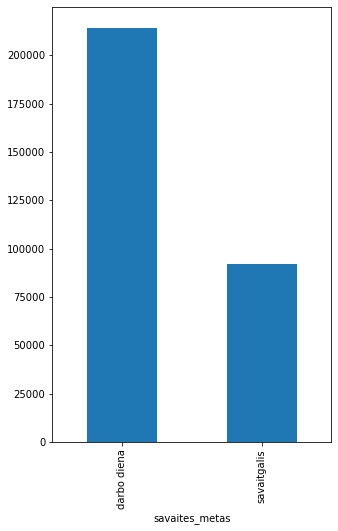

In [128]:
# Kuriuo savaitės metu nutinka daugiausiai įvykių?
laik.groupby('savaites_metas')['ivykiu_skaicius'].sum().plot.bar()

In [18]:
# Kuriuo metu (darbo dieną) įvyksta daugiausiai įvykių:
laik[laik['savaites_metas'] == 'darbo diena'].groupby(['savaite_valanda_minute','paros_metas'])['ivykiu_skaicius'].sum().sort_values(ascending = False).to_frame().head(5)

,,ivykiu_skaicius
savaite_valanda_minute,paros_metas,
4_20_20-29,dienos metu,486
4_20_00-09,dienos metu,474
1_19_20-29,dienos metu,469
1_20_20-29,dienos metu,467
5_20_40-49,dienos metu,466


In [19]:
# Kuriuo metu (savaitgalį) įvyksta daugiausiai įvykių:
laik[laik['savaites_metas'] == 'savaitgalis'].groupby(['savaite_valanda_minute','paros_metas'])['ivykiu_skaicius'].sum().sort_values(ascending = False).to_frame().head(5)

,,ivykiu_skaicius
savaite_valanda_minute,paros_metas,
7_22_10-19,nakties metu,558
7_21_20-29,dienos metu,527
7_22_00-09,nakties metu,516
6_22_20-29,nakties metu,512
7_22_20-29,nakties metu,511


Galime pastebėti, kad savaitgaliais daugiausiai įvykių įvyksta nakties metu ir sekmadieniais, o darbo dienomis - dienos metu ir ketvirtadieniais bei pirmadieniais.

In [28]:
# Kuriomis valandomis (darbo dieną ir dienos metu) nutinka daugiausiai įvykių:
laik[(laik['savaites_metas'] == 'darbo diena') & (laik['paros_metas'] == 'dienos metu')].groupby(['savaite_valanda_minute'])['ivykiu_skaicius'].sum().sort_values(ascending = False).to_frame().tail(5)

,ivykiu_skaicius
savaite_valanda_minute,
2_6_10-19,102
2_6_00-09,101
1_6_00-09,101
3_6_10-19,98
3_6_00-09,97


In [29]:
# Kuriomis valandomis (savaitgalį ir dienos metu) nutinka daugiausiai įvykių:
laik[(laik['savaites_metas'] == 'savaitgalis') & (laik['paros_metas'] == 'dienos metu')].groupby(['savaite_valanda_minute'])['ivykiu_skaicius'].sum().sort_values(ascending = False).to_frame().tail(5)

,ivykiu_skaicius
savaite_valanda_minute,
7_6_20-29,119
6_6_30-39,109
6_6_10-19,108
7_6_00-09,107
6_6_00-09,107


Galime pastebėti, kad dienos metu tiek savaitgaliais, tiek ir darbo dienomis, daugiausiai įvykių įvyksta 6 valandą ryto.

In [124]:
# Kokie įvykių tipai populiariausi darbo dienomis?
laik[laik['savaites_metas'] == 'darbo diena'].groupby(['ivykio_tipo_kodas._id'])['ivykiu_skaicius'].sum().sort_values(ascending = False).to_frame().head(5)

,ivykiu_skaicius
ivykio_tipo_kodas._id,
505a4081-64ab-4a13-9fad-ec1ed336e57d,77924
4b327b2f-1740-4e0e-b8c8-06299aeec6d9,21249
ec94b5d5-cc96-4dfb-bedf-e5500d0de49b,18055
32d83c23-146c-4499-91db-5fa305f5cd18,10845
32d2310b-621e-457c-8159-670b185fa580,8758


In [25]:
# Kokie įvykių tipai popliariausi savaitgaliais?
laik[laik['savaites_metas'] == 'savaitgalis'].groupby(['ivykio_tipo_kodas._id'])['ivykiu_skaicius'].sum().sort_values(ascending = False).to_frame().head(5)

,ivykiu_skaicius
ivykio_tipo_kodas._id,
505a4081-64ab-4a13-9fad-ec1ed336e57d,30962
4b327b2f-1740-4e0e-b8c8-06299aeec6d9,12170
ec94b5d5-cc96-4dfb-bedf-e5500d0de49b,6734
32d2310b-621e-457c-8159-670b185fa580,4403
32d83c23-146c-4499-91db-5fa305f5cd18,4254


In [27]:
klas[klas['_id'] == '32d2310b-621e-457c-8159-670b185fa580']

,_type,_id,_revision,ivykio_tipo_kodas,aukstesnis_ivykio_tipas,zemesnis_ivykio_tipas
138,datasets/gov/bpc/pagalbos_skambuciai/IvykiuKla...,32d2310b-621e-457c-8159-670b185fa580,af710ed1-f81d-44c1-a955-97560b384276,6.5.4,Policijos įvykiai,Smurtas artimoje aplinkoje


Pastebime, kad populiariausi įvykių tipai išlieka tie patys tiek savaitgaliais, tiek darbo dienomis. Tačiau įvykio tipas '32d2310b-621e-457c-8159-670b185fa580' - Smurtas artimoje aplinkoje darbo dienomis užima penktąją vietą, o savaitgaliais jau ketvirtąją.

In [49]:
# Kurią savaitės dieną įvyksta daugiausiai įvykių dienos metu?
laik[laik['paros_metas'] == 'dienos metu'].groupby('savaites_diena')['ivykiu_skaicius'].sum().sort_values(ascending = False)

savaites_diena
4    35471
7    35092
2    34702
6    34543
5    33832
3    33668
1    32959
Name: ivykiu_skaicius, dtype: int64

In [142]:
# Kurią savaitės dieną įvyksta daugiausiai įvykių nakties metu?
laik[laik['paros_metas'] == 'nakties metu'].groupby('savaites_diena')['ivykiu_skaicius'].sum().sort_values(ascending = False)

savaites_diena
7    12901
1    11359
6     9771
4     8445
2     8100
5     8026
3     7604
Name: ivykiu_skaicius, dtype: int64

Pastebime, įdomų faktą, kad dienos metu pirmadieniais įvyksta mažiausiai įvykių, tačiau nakties metu - pirmadieniai užima net antrąją vietą.

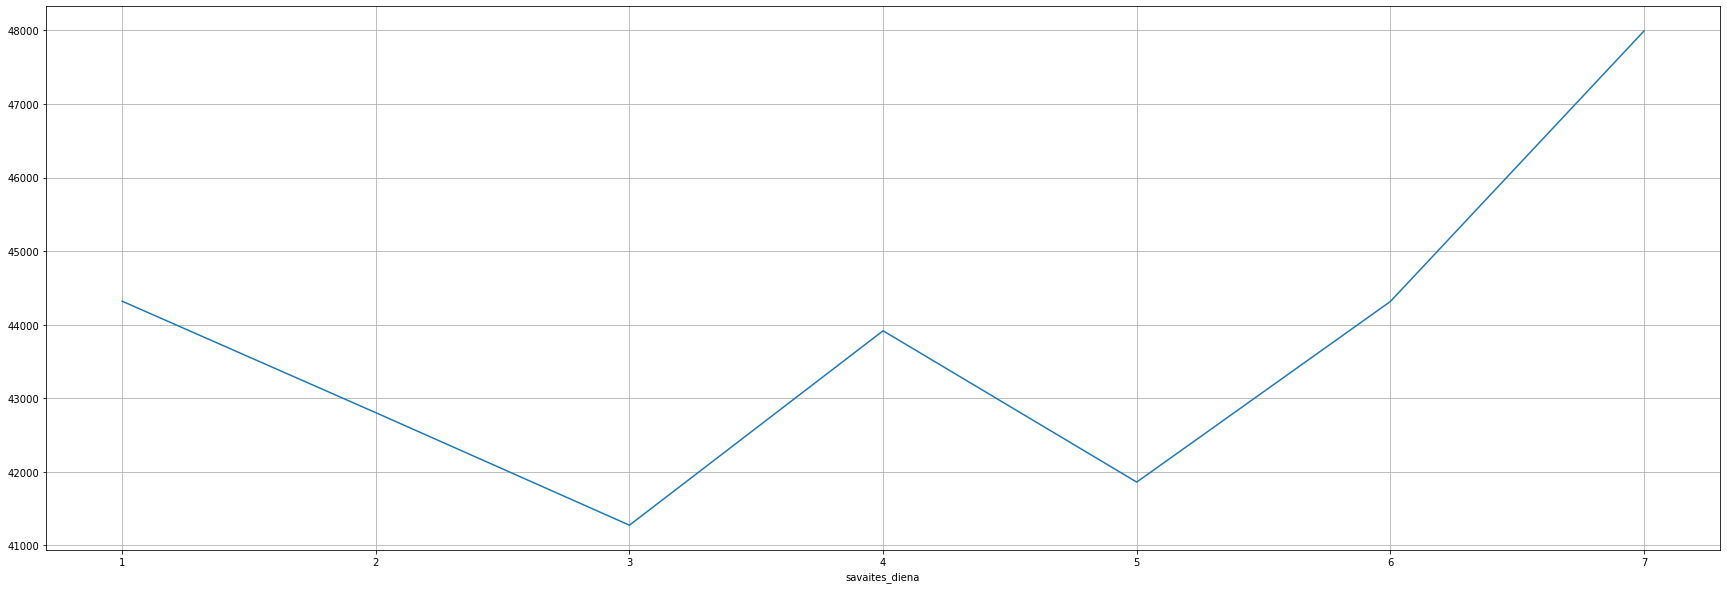

In [40]:
# Kuriomis savaitės dienomis, tiek dienos, tiek ir nakties metu įvykių yra daugiausia ?
mpl.rc('figure', figsize=(30,10))
laik.groupby(['savaites_diena'])['ivykiu_skaicius'].sum().plot()
plt.grid()

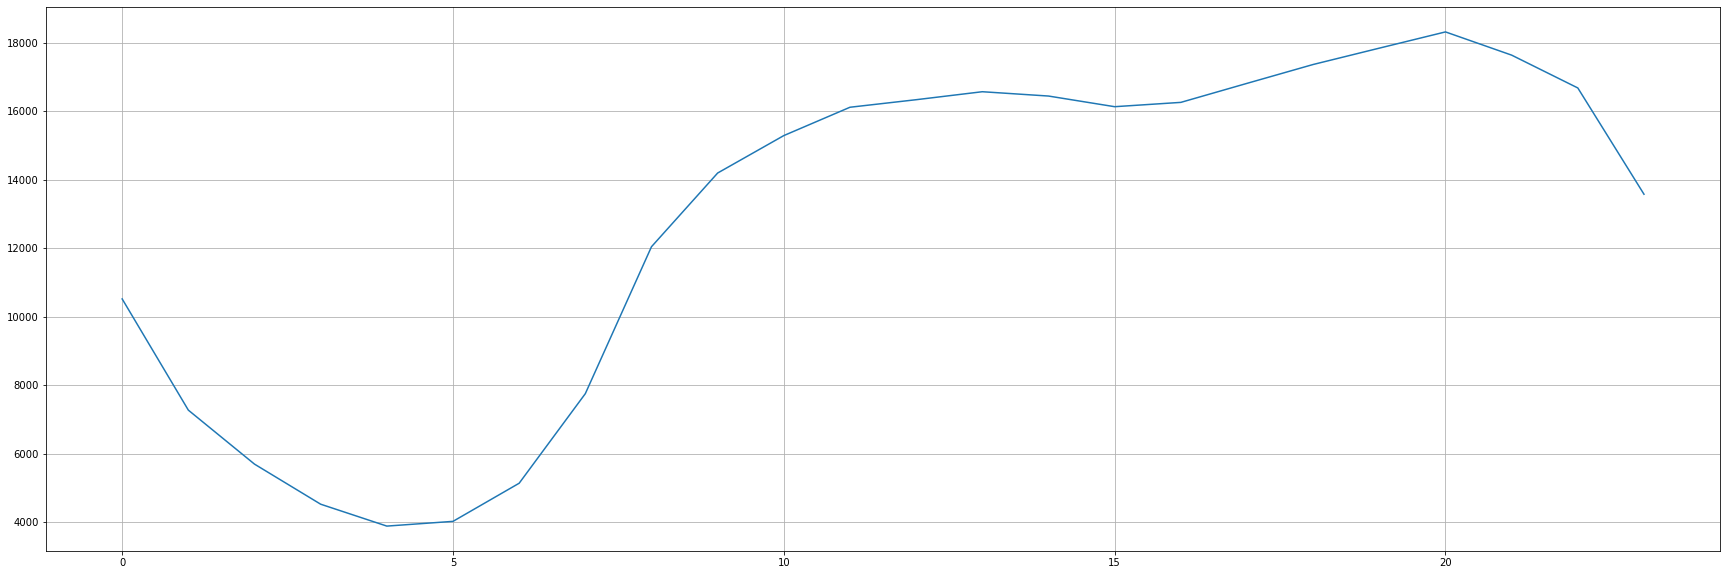

In [44]:
# Kuriomis valandomis, tiek savaitgaliais, tiek ir darbo dienomis, įvykių yra daugiausia?
mpl.rc('figure', figsize=(30,10))
plt.plot(laik.groupby('valanda')['ivykiu_skaicius'].sum())
plt.grid()

In [ ]:
sav.info()
# ivykio_skaicius nėra struktūros apraše

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8070 entries, 0 to 8069
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _type                  8070 non-null   object 
 1   _id                    8070 non-null   object 
 2   _revision              8070 non-null   object 
 3   ivykio_tipo_kodas._id  8070 non-null   object 
 4   savivaldybes_kodas     8041 non-null   float64
 5   savivaldybe            8070 non-null   object 
 6   metai                  8070 non-null   int64  
 7   menuo                  8070 non-null   int64  
 8   ivykiu_skaicius        8070 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 567.5+ KB


In [ ]:
sav.nunique()

_type                       1
_id                      8070
_revision                8070
ivykio_tipo_kodas._id     146
savivaldybes_kodas         60
savivaldybe                61
metai                       1
menuo                       3
ivykiu_skaicius           385
dtype: int64

In [ ]:
sav.head()

,_type,_id,_revision,ivykio_tipo_kodas._id,savivaldybes_kodas,savivaldybe,metai,menuo,ivykiu_skaicius
0,datasets/gov/bpc/pagalbos_skambuciai/IvykiuSav...,23284831-c902-413c-9cae-6e1124bbab67,74516803-e4f5-4727-8633-5584ef5155aa,f3d4e6c8-e38b-4cab-a9a2-6abaaedbe5e6,11.0,Alytaus m. sav.,2022,6,2
1,datasets/gov/bpc/pagalbos_skambuciai/IvykiuSav...,aab51fec-d505-400e-9460-b7f214ffb964,ec795d16-fa0b-43ea-a3e1-77019ad87f64,32d83c23-146c-4499-91db-5fa305f5cd18,11.0,Alytaus m. sav.,2022,8,58
2,datasets/gov/bpc/pagalbos_skambuciai/IvykiuSav...,d35912b7-62c0-4484-adfd-6b4d91b9e273,aefc67d8-f1e8-4d9e-a495-155b14e04de0,0c201a9c-ae10-4269-8c38-150fad5db16d,11.0,Alytaus m. sav.,2022,8,7
3,datasets/gov/bpc/pagalbos_skambuciai/IvykiuSav...,679c3e7a-87f6-40a1-b52c-57beedbc6a33,3388fb8d-1800-4292-b14f-9b6dffa98759,bb824141-bc54-456e-9d47-9415688cde17,36.0,Biržų r. sav.,2022,6,12
4,datasets/gov/bpc/pagalbos_skambuciai/IvykiuSav...,d39e4c49-8f8a-4a98-b35f-0b0454b63a81,aba3bab0-4ac6-4506-ba88-d829b3f9a010,b5f1b57a-a7df-456f-acc9-94fbf15471ec,36.0,Biržų r. sav.,2022,7,5


In [ ]:
# Populiariausi įvykių tipai:
sav.groupby('ivykio_tipo_kodas._id')['ivykiu_skaicius'].sum().sort_values(ascending = False).head(3)

ivykio_tipo_kodas._id
505a4081-64ab-4a13-9fad-ec1ed336e57d    108886
4b327b2f-1740-4e0e-b8c8-06299aeec6d9     33419
ec94b5d5-cc96-4dfb-bedf-e5500d0de49b     24789
Name: ivykiu_skaicius, dtype: int64

In [ ]:
# Populiariausi įvykių tipai:
sav.groupby(['ivykio_tipo_kodas._id', 'menuo'])['ivykiu_skaicius'].sum().sort_values(ascending = False).head(9).to_frame()

ivykiu_skaicius
ivykio_tipo_kodas._id                menuo                 
505a4081-64ab-4a13-9fad-ec1ed336e57d 7                36939
                                     8                35991
                                     6                35956
4b327b2f-1740-4e0e-b8c8-06299aeec6d9 8                12262
                                     7                11286
                                     6                 9871
ec94b5d5-cc96-4dfb-bedf-e5500d0de49b 6                 8600
                                     8                 8162
                                     7                 8027

In [ ]:
# Pasinaudojant ĮvykiųKlasifikatorius duomenimis, išvedami įvykio tipo duomenys
klas[klas['_id'] == '505a4081-64ab-4a13-9fad-ec1ed336e57d']

,_type,_id,_revision,ivykio_tipo_kodas,aukstesnis_ivykio_tipas,zemesnis_ivykio_tipas
12,datasets/gov/bpc/pagalbos_skambuciai/IvykiuKla...,505a4081-64ab-4a13-9fad-ec1ed336e57d,38c04d27-d8ab-4749-90b6-e3d551b21aa4,2.1,BPC-GMP,GMP įvykis
